# Satellite View Model Prototype

The purpose of this notebook is for experimentation and prototyping of a satellite view model and image geolocation functionality. This involves determining the satellite's orbit and attitude and then with additional parameters like epoch time, satellite attitude, image sensor FOV, and WSG84 ellipsoid we can determine which part of the Earth the satellite can "see". This will then be used to geolocate the collected image data.

Written by Chris Stewart - 2021/07/17

The main approach and functionality in this notebook would be to:
- Find/Define a common format for orbital data (e.g. orbital state vectors, TLE, Keplerian Elements) - Functionality to ingest orbital data into this system
- Convert from one format to the others (e.g. TLE -> Keplerian) 
- Visualize that data to show satellite and orbit (animation if possible)
- Process data with parameters to determine satellite view (parameterized!)

Definitions:
- TLE = Two-line element

Orbital State Vectors:
	- Position-Velocity vectors: -Vx, Vy, Vz

	- ecef coordinates: X: vernal equinox, Y: , Z: 




Python Liberaries:

- SGP4 = Simplified General Pertubations Model, https://pypi.org/project/sgp4/
	- this is a library for calcualting the position and velocity of earth orbiting satellites from their TLE. If the orbital period of a satellite
- Astropy
- skyfield

### To Discuss:
- Source of information - Clyde space are they giving us TLEs or orbital state vectors? (will need pointing info from Clyde)
- We can independantly get TLE for our satellite from the space track website (API) if we want our own channel in between Clyde uploads
- 




## STK vs. DIY (e.g. Astropy, PySat, skyfield)

- STK - Commercial off the shelf tool with a variety of plugins to add additional functionality
    - Cost: $$$ (website doesn't give exact figure but have heard its very expensive)
    - 
    
    
- DIY - we build the satellite viewing model and task scheduler ourselves
    - Cost: $ (for time)

In [2]:
# libraries
import json
import numpy as np
import matplotlib.pyplot as plt
#from scipy.integrate import ode
from mpl_toolkits.mplot3d import Axes3D
#plt.style.use('dark_background')

In [ ]:
pysat

In [17]:
def plot(rs):
    fig = plt.figure(figsize=(18,6))
    ax = fig.add_subplot(111, projection='3d')
    
    # params setup
    EARTH_RADIUS = 6378.0 # km - equatorial 
    EARTH_MU = 398600.0 # km^3 / s^2
    
    
    # trajectory
    #ax.plot(rs[:,0],rs[:,1],rs[:,2],'w',label='Trajectory')
    #ax.plot([[rs[0,0]],[rs[0,1]],[rs[0,2]]],'wo', label='Initial Position') # plot initial start condition
    
    # central body
    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    x = EARTH_RADIUS*np.cos(u)*np.sin(v)
    y = EARTH_RADIUS*np.sin(u)*np.sin(v)
    z = EARTH_RADIUS*np.cos(v)
    
    # plot the surface
    #ax.plot_surface(x, y, z, color='b')
    ax.plot_surface(x, y, z, cmap='Blues_r')

    # plot the x, y, z axis
    l = EARTH_RADIUS*2 # length of axis vectors
    x,y,z = [[0,0,0],[0,0,0],[0,0,0]] # start of axis vectors
    u,v,w = [[1,0,0],[0,1,0],[0,0,1]] # end of axis vectors
    ax.quiver(x,y,z,u,v,w,color='k') # plot axis vectors
    
    # set axis scale to be dynamic based on input
    max_val = np.max(np.abs(rs))
    ax.set_xlim([-max_val, max_val])
    ax.set_ylim([-max_val, max_val])
    ax.set_zlim([-max_val, max_val])
    
    ax.set_xlabel(['X (km)'])
    ax.set_ylabel(['Y (km)'])
    ax.set_zlabel(['Z (km)'])
    
    ax.set_aspect('auto') # make the plot look better on a 2D screen
    ax.set_title('Earth Plot')
    #plt.legend() # add legend
    
    #plt.show()
    
    # rotate the axes and update
#     for angle in range(0, 360):
#         ax.view_init(30, angle)
#         plt.draw()
#         plt.pause(.001)
    

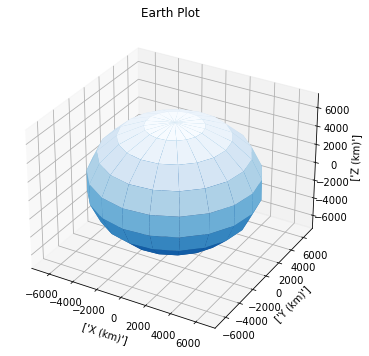

In [18]:
rs = [[0,0,0],[3600,3600,3600],[7200,7200,7200]]
plot(rs)

--------

## WIP Experiments Below this point

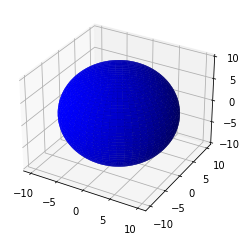

In [7]:
'''
========================
3D surface (solid color)
========================

Demonstrates a very basic plot of a 3D surface using a solid color.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 10 * np.outer(np.cos(u), np.sin(v))
y = 10 * np.outer(np.sin(u), np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
ax.plot_surface(x, y, z, color='b')

plt.show()


In [ ]:
# json
with open("data_file.json", "w") as write_file:
    json.dump(data, write_file)

json_string = json.dumps(data, indent=4)

# deserialization
with open("data_file.json", "r") as read_file:
    data = json.load(read_file)


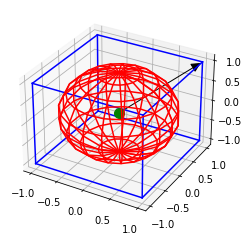

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect("auto")

# draw cube
r = [-1, 1]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot3D(*zip(s, e), color="b")

# draw sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="r")

# draw a point
ax.scatter([0], [0], [0], color="g", s=100)

# draw a vector
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

a = Arrow3D([0, 1], [0, 1], [0, 1], mutation_scale=20,
            lw=1, arrowstyle="-|>", color="k")
ax.add_artist(a)
plt.show()

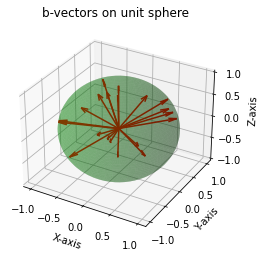

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

# draw sphere
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
# alpha controls opacity
ax.plot_surface(x, y, z, color="g", alpha=0.3)


# a random array of 3D coordinates in [-1,1]
bvecs= np.random.randn(20,3)

# tails of the arrows
tails= np.zeros(len(bvecs))

# heads of the arrows with adjusted arrow head length
ax.quiver(tails,tails,tails,bvecs[:,0], bvecs[:,1], bvecs[:,2],
          length=1.0, normalize=True, color='r', arrow_length_ratio=0.15)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

ax.set_title('b-vectors on unit sphere')

plt.show()

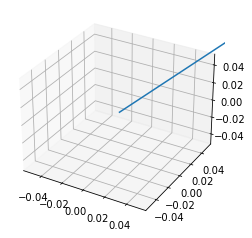

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect("auto")

#draw the arrow
ax.quiver(0,0,0,1,1,1,length=1.0)

plt.show()

Things to look at:




https://space.stackexchange.com/questions/25958/how-can-i-plot-a-satellites-orbit-in-3d-from-a-tle-using-python-and-skyfield?noredirect=1&lq=1
